In [9]:
from pycocotools.coco import COCO
import json

### This notebook was made only to create files needed at that time for specific task. However should be structered to help understand how the format looks like and to swiftly code your own merging depending on your needs

In [10]:
LAST_PICTURE_NAME = 667

In [11]:
PATH1 = "/Users/grundfestdavid/Desktop/old_images.json"
PATH2 = "/Users/grundfestdavid/Desktop/new_images.json"

# How coco annotation is structured

We need to create 5 lists and put them inside a huge dict which will be written into a file. 
What these lists consist of is shown below

In [12]:
with open(PATH1, "r") as file:
    ann = json.load(file)

ann.keys()

dict_keys(['annotations', 'licenses', 'info', 'categories', 'images'])

In [13]:
print(type(ann["annotations"]))
ann["annotations"]

<class 'list'>


[{'id': 0,
  'iscrowd': 0,
  'category_id': 1,
  'area': 395.3752,
  'bbox': [295.85, 517.79, 14.32, 27.61],
  'segmentation': [],
  'image_id': 1,
  'attributes': {'occluded': False}},
 {'id': 0,
  'iscrowd': 0,
  'category_id': 1,
  'area': 289.47780000000046,
  'bbox': [424.67, 526.91, 9.63, 30.06],
  'segmentation': [],
  'image_id': 1,
  'attributes': {'occluded': False}},
 {'id': 0,
  'iscrowd': 0,
  'category_id': 1,
  'area': 490.3167999999991,
  'bbox': [281.62, 506.41, 14.32, 34.24],
  'segmentation': [],
  'image_id': 1,
  'attributes': {'occluded': False}},
 {'id': 0,
  'iscrowd': 0,
  'category_id': 2,
  'area': 5278.0,
  'bbox': [48.23, 294.76, 100.75, 88.27],
  'segmentation': [[48.23,
    361.63,
    51.8,
    381.25,
    114.21,
    383.03,
    148.98,
    338.45,
    148.98,
    320.62,
    123.13,
    294.76,
    87.46,
    324.18]],
  'image_id': 1,
  'attributes': {'occluded': False}},
 {'id': 0,
  'iscrowd': 0,
  'category_id': 1,
  'area': 500.50210000000067,
  '

In [14]:
print(type(ann["licenses"]))
ann["licenses"]

<class 'list'>


[{'id': 0, 'name': '', 'url': ''}]

In [15]:
print(type(ann["info"]))
ann["info"]

<class 'dict'>


{'date_created': '',
 'year': '',
 'version': '',
 'description': '',
 'url': '',
 'contributor': ''}

In [16]:
print(type(ann["categories"]))
ann["categories"]

<class 'list'>


[{'id': 1, 'name': 'caries', 'supercategory': ''},
 {'id': 2, 'name': 'restoration', 'supercategory': ''}]

In [17]:
print(type(ann["images"]))
ann["images"]

<class 'list'>


[{'id': 1,
  'file_name': '1.png',
  'flickr_url': '',
  'height': 847,
  'date_captured': 0,
  'license': 0,
  'coco_url': '',
  'width': 1068},
 {'id': 2,
  'file_name': '10.png',
  'flickr_url': '',
  'height': 847,
  'date_captured': 0,
  'license': 0,
  'coco_url': '',
  'width': 1068},
 {'id': 3,
  'file_name': '100.png',
  'flickr_url': '',
  'height': 847,
  'date_captured': 0,
  'license': 0,
  'coco_url': '',
  'width': 1068},
 {'id': 4,
  'file_name': '101.png',
  'flickr_url': '',
  'height': 847,
  'date_captured': 0,
  'license': 0,
  'coco_url': '',
  'width': 1068},
 {'id': 5,
  'file_name': '102.png',
  'flickr_url': '',
  'height': 847,
  'date_captured': 0,
  'license': 0,
  'coco_url': '',
  'width': 1068},
 {'id': 6,
  'file_name': '103.png',
  'flickr_url': '',
  'height': 847,
  'date_captured': 0,
  'license': 0,
  'coco_url': '',
  'width': 1068},
 {'id': 7,
  'file_name': '104.png',
  'flickr_url': '',
  'height': 847,
  'date_captured': 0,
  'license': 0,
  '

# Loading annotations 

In [18]:
with open(PATH1, "r") as file:
    ann1 = json.load(file)

with open(PATH2, "r") as file:
    ann2 = json.load(file)

ann1.keys(), ann2.keys()

(dict_keys(['annotations', 'licenses', 'info', 'categories', 'images']),
 dict_keys(['licenses', 'annotations', 'categories', 'info', 'images']))

## Renaming annotation ids
CVAT has a bug in their export and all annotations have id = 0. Thus first thing is we remake the ids. But first we get rid of annotations of dental caries, because we do not work with them here. Dental caries are only in "ann1".

In [19]:
index = 0
print(len(ann1["annotations"]))
while index < len(ann1["annotations"]):
    if ann1["annotations"][index]["category_id"] == 1:
        ann1["annotations"].pop(index)
    else:
        ann1["annotations"][index]["category_id"] = 1
        ann1["annotations"][index]["id"] = index

        index += 1

print(len(ann1["annotations"]))

2336
1633


In [20]:
print(ann1["annotations"][-1])
last_id = ann1["annotations"][-1]["id"]
last_image_id = len(ann1["images"])

{'id': 1632, 'iscrowd': 0, 'category_id': 1, 'area': 28285.0, 'bbox': [395.69, 486.91, 338.07, 142.6], 'segmentation': [[401.84, 513.95, 411.67, 534.85, 420.28, 566.81, 446.09, 601.23, 466.99, 624.59, 495.27, 629.51, 522.31, 628.28, 550.59, 611.07, 566.57, 614.76, 603.45, 612.3, 619.43, 591.4, 644.01, 571.73, 672.29, 568.04, 733.76, 532.39, 733.76, 518.87, 664.91, 500.43, 600.99, 518.87, 569.03, 531.16, 526.0, 507.81, 487.89, 496.74, 448.55, 486.91, 423.97, 486.91, 395.69, 494.28]], 'image_id': 521, 'attributes': {'occluded': False}}


The second annotation file was focusing only on dental restorations and thus we only rename ids, continuing from end of the previous file

We also have to rename image ids, as the image ids in the second file have to grow acordingly when addded to the first file (They both begin with image id 1)

In [21]:
for index, ann in enumerate(ann2["annotations"], start = 1):
    ann["id"] = index + last_id
    ann["image_id"] += last_image_id

print(ann2["annotations"][0])
print(ann2["annotations"][-1])

{'category_id': 1, 'segmentation': [[740.17, 315.31, 745.13, 290.55, 798.97, 294.26, 798.35, 283.74, 824.96, 282.5, 855.91, 302.93, 890.57, 309.12, 891.8, 333.25, 876.95, 340.68, 811.35, 318.4, 777.93, 320.26, 769.26, 317.16]], 'area': 4583.0, 'bbox': [740.17, 282.5, 151.63, 58.18], 'image_id': 522, 'attributes': {'occluded': False}, 'id': 1633, 'iscrowd': 0}
{'category_id': 1, 'segmentation': [[609.65, 306.79, 626.73, 294.16, 639.36, 260.0, 689.86, 260.74, 716.59, 250.35, 731.45, 257.77, 745.56, 276.34, 770.07, 250.35, 796.8, 242.92, 822.05, 260.74, 828.74, 275.6, 836.16, 279.31, 811.66, 301.59, 793.09, 309.02, 712.88, 330.55]], 'area': 11924.0, 'bbox': [609.65, 242.92, 226.51, 87.63], 'image_id': 989, 'attributes': {'occluded': False}, 'id': 3286, 'iscrowd': 0}


In order to merge files, we have to change image ids.
We leave the first file as it is and continue with image ids in the second file

In [22]:
for image_dict in ann2["images"]:
    image_dict["id"] += last_image_id

ann2["images"] = ann2["images"][:468]
ann2["images"][-1]

{'flickr_url': '',
 'coco_url': '',
 'date_captured': 0,
 'height': 847,
 'width': 1068,
 'id': 989,
 'file_name': '667.png',
 'license': 0}

Not all images were properly annotated. The doctors left some of them out. Because of alphabetical ordering in CVAT, first images in second task are 1000.png, 1001.png etc. The doctors were able to annotate them up till CVAT id 467 - image 667.png. Thus we cut this this list of images at that id.

# Merging files

In [23]:
complete_anotation = {"licenses": ann1["licenses"].copy(), "info":ann1["info"].copy(), "categories": ann2["categories"].copy()}
complete_anotation

{'licenses': [{'id': 0, 'name': '', 'url': ''}],
 'info': {'date_created': '',
  'year': '',
  'version': '',
  'description': '',
  'url': '',
  'contributor': ''},
 'categories': [{'id': 1, 'name': 'restoration', 'supercategory': ''}]}

In [24]:
images = ann1["images"].copy()
images.extend(ann2["images"])
print(len(images))
images[-5:]

989


[{'flickr_url': '',
  'coco_url': '',
  'date_captured': 0,
  'height': 847,
  'width': 1068,
  'id': 985,
  'file_name': '663.png',
  'license': 0},
 {'flickr_url': '',
  'coco_url': '',
  'date_captured': 0,
  'height': 847,
  'width': 1068,
  'id': 986,
  'file_name': '664.png',
  'license': 0},
 {'flickr_url': '',
  'coco_url': '',
  'date_captured': 0,
  'height': 847,
  'width': 1068,
  'id': 987,
  'file_name': '665.png',
  'license': 0},
 {'flickr_url': '',
  'coco_url': '',
  'date_captured': 0,
  'height': 847,
  'width': 1068,
  'id': 988,
  'file_name': '666.png',
  'license': 0},
 {'flickr_url': '',
  'coco_url': '',
  'date_captured': 0,
  'height': 847,
  'width': 1068,
  'id': 989,
  'file_name': '667.png',
  'license': 0}]

In [25]:
anns = ann1["annotations"].copy()
anns.extend(ann2["annotations"])
print(len(anns))
anns, anns[-1]

3287


([{'id': 0,
   'iscrowd': 0,
   'category_id': 1,
   'area': 5278.0,
   'bbox': [48.23, 294.76, 100.75, 88.27],
   'segmentation': [[48.23,
     361.63,
     51.8,
     381.25,
     114.21,
     383.03,
     148.98,
     338.45,
     148.98,
     320.62,
     123.13,
     294.76,
     87.46,
     324.18]],
   'image_id': 1,
   'attributes': {'occluded': False}},
  {'id': 1,
   'iscrowd': 0,
   'category_id': 1,
   'area': 3698.0,
   'bbox': [550.5, 490.16, 87.05, 68.99],
   'segmentation': [[637.55,
     492.54,
     595.91,
     490.16,
     553.09,
     505.62,
     550.5,
     509.7,
     555.1,
     513.5,
     558.2,
     516.3,
     562.2,
     523.2,
     561.41,
     521.09,
     594.72,
     550.83,
     617.33,
     541.31,
     631.6,
     559.15]],
   'image_id': 2,
   'attributes': {'occluded': False}},
  {'id': 2,
   'iscrowd': 0,
   'category_id': 1,
   'area': 495.0,
   'bbox': [468.12, 499.58, 34.24, 22.46],
   'segmentation': [[468.12,
     501.72,
     475.61,
     5

In [26]:
complete_anotation["images"] = images
complete_anotation["annotations"] = anns
complete_anotation.keys()

dict_keys(['licenses', 'info', 'categories', 'images', 'annotations'])

In [27]:
output_path = "complete_annotation.json"

In [28]:
with open(output_path, "w") as file:
    json.dump(complete_anotation, file, indent=4)

In [29]:
#Making sure COCO class can read it
c = COCO(output_path)
#c.cats, c.imgs, c.anns

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


# Preparing yolo file
Yolo focus on detection and uses bounding boxes. The format for annottion is as follows:
<class> <x> <y> <w> <h>
All coordinates are normalized for cases where we want to scale images.

COCO bbox has luckily the same format, just not notmalized.

In [30]:
from matplotlib import pyplot as plt
from matplotlib import patches
from PIL import Image

In [31]:
l = [
                48.23,
                294.76,
                100.75,
                88.27
            ]

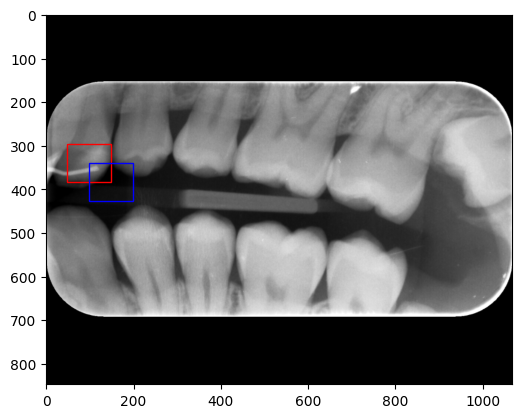

In [74]:
image = Image.open("1.png")
fig, ax = plt.subplots()
bb = patches.Rectangle((l[0],l[1]), l[2],l[3], linewidth = 1, facecolor = "none", edgecolor = "red")
ax.add_patch(bb)
x_center = (2*l[0] + l[2])/2
y_center = (2*l[1] + l[3])/2
bb = patches.Rectangle((x_center,y_center), l[2],l[3], linewidth = 1, facecolor = "none", edgecolor = "blue")
ax.add_patch(bb)
ax.imshow(image)
plt.show()

In [55]:
from os import path, listdir
from tqdm import tqdm
from pathlib import Path

In [71]:
file = None
file_name = ""
path_to_files = "/Users/grundfestdavid/Desktop/Bakalářský projekt/Bez názvu/Bc_project/data_handling/yolo_data/training_data"
yolo_ann = None

with tqdm(total= len(complete_anotation["images"]), unit= "img") as pbar:
    for ann in complete_anotation["annotations"]:
        image = complete_anotation["images"][ann["image_id"]-1]
        image_name = image["file_name"]
        width = image["width"]
        height = image["height"]
        #get into list, get index one lower because it starts at 1 and then get file name
        #dict -> list -> dict
        if image_name != file_name:
            try:
                print(yolo_ann, file= file)
                pbar.update(1)
                yolo_ann = ""
                file.close()
            except AttributeError:
                pass
            finally:
                file_name = image_name
                file = open(path.join(path_to_files, F"{file_name[:-3]}txt"), "w")
        bb = ann["bbox"]
        x_center = (2*bb[0] + bb[2])/2
        y_center = (2*bb[1] + bb[3])/2
        yolo_ann += F"0 {x_center/width} {y_center/height} {bb[2]/width} {bb[3]/height}\n"

print(yolo_ann, file= file)
file.close()

 21%|██▏       | 211/989 [00:00<00:00, 2108.33img/s]

None


 76%|███████▋  | 756/989 [00:00<00:00, 1218.71img/s]


Some images has no restoration, thus there is no annotation and thus no textfile. Now we have to loop over those files and create empty text files for missing numbers

In [66]:
lst = listdir("yolo_data/training_data/")
lst = sorted(list(map(lambda x: int(x[:-4]), lst)))
lst

[1,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 46,
 47,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 67,
 70,
 71,
 74,
 77,
 78,
 80,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 105,
 106,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 136,
 139,
 140,
 141,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 157,
 158,
 159,
 163,
 164,
 165,
 166,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 182,
 183,
 184,
 187,
 188,
 189,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 207,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 224,
 225,
 226

In [67]:
print(lst[509])

1000


In [69]:
def fill(this_lst, index):
    for number in this_lst:
        while number != index:
            Path(F'yolo_data/training_data/{index}.txt').touch()
            index += 1
        index += 1

In [70]:
fill(lst[:509], 1)
fill(lst[509:], 1000)

### Now we have to create files containing paths to images

In [75]:
import random
import os
def divide_data():
    def change_dir(first_dir, next_dir, names):
        for filename in names:
            filename = F"{filename}.png"
            os.rename(os.path.join(first_dir, filename), os.path.join(next_dir, filename))


    all_images = sorted(list(map(lambda x: int(x[:-4]), os.listdir(path_to_files))))
    random.seed(42)
    random.shuffle(all_images)

    lenght = len(all_images)
    val_index = int(0.1 * lenght)
    test_index = int(0.2 * lenght)

    val_images = all_images[:val_index]
    test_images = all_images[val_index:test_index]
    training_images = all_images[test_index:]
    return val_images, test_images, training_images

In [77]:
def text_file(filename, list):
    with open(filename, "w") as file:
        for image_name in list:
            print(os.path.join('/home.stud/grundda2/bc_project/darknet/data/dental_images', F'{image_name}.png'), file=file)


In [78]:
val_images, test_images, train_images = divide_data()
text_file("train_set.txt", train_images)
text_file("val_set.txt", val_images)
text_file("test_set.txt", test_images)